# Project - Data Cleaning

## Introduction
In this lab, we'll make use of everything we've learned about pandas, data cleaning, and Exploratory Data Analysis. In order to complete this lab, you'll have to make import, clean, combine, reshape, and visualize data to answer questions provided, as well as your own questions!

## Objectives
You will be able to:
* Show mastery of the content covered in this section

## The Dataset
In this lab, we'll work with the comprehensive [Super Heroes Dataset](https://www.kaggle.com/claudiodavi/superhero-set/data), which can be found on Kaggle!

## Goals
* Use all available pandas knowledge to clean the dataset and deal with null values
* Use Queries and aggregations to group the data into interesting subsets as needed
* Use descriptive statistics and data visualization to find answers to questions we may have about the data. 

## Getting Started

In the cell below:

* Import and alias pandas as `pd`
* Import and alias numpy as `np`
* Import and alias seaborn as `sns`
* Import and alias matplotlib.pyplot as `plt`
* Set matplotlib visualizations to display inline in the notebook

In [96]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

For this lab, our dataset is split among two different sources--`heroes_information.csv` and `super_hero_powers.csv`.

Use pandas to read in each file and store them in DataFrames in the appropriate variables below. Then, display the head of each to ensure that everything loaded correctly.  

In [2]:
heroes_df = pd.read_csv('heroes_information.csv')
powers_df = pd.read_csv('super_hero_powers.csv')

It looks as if the heroes information dataset contained an index column.  We did not specify that this dataset contained an index column, because we hadn't seen it yet. Pandas does not know how to tell apart an index column from any other data, so it stored it with the column name `Unnamed: 0`.  

Our DataFrame provided row indices by default, so this column is not needed.  Drop it from the DataFrame in place in the cell below, and then display the head of `heroes_df` to ensure that it worked properly. 

In [3]:
heroes_df.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
heroes_df.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


In [5]:
powers_df.head()

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Familiarize Yourself With the Dataset

The first step in our Exploratory Data Analysis will be to get familiar with the data.  This step includes:

* Understanding the dimensionality of your dataset
* Investigating what type of data it contains, and the data types used to store it
* Discovering how missing values are encoded, and how many there are
* Getting a feel for what information it does and doesn't contain

In the cell below, get the descriptive statistics of each DataFrame.  

In [6]:
heroes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 10 columns):
name          734 non-null object
Gender        734 non-null object
Eye color     734 non-null object
Race          734 non-null object
Hair color    734 non-null object
Height        734 non-null float64
Publisher     719 non-null object
Skin color    734 non-null object
Alignment     734 non-null object
Weight        732 non-null float64
dtypes: float64(2), object(8)
memory usage: 57.4+ KB


In [7]:
powers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Columns: 168 entries, hero_names to Omniscient
dtypes: bool(167), object(1)
memory usage: 114.1+ KB


In [8]:
powers_df.isna().any()

hero_names               False
Agility                  False
Accelerated Healing      False
Lantern Power Ring       False
Dimensional Awareness    False
Cold Resistance          False
Durability               False
Stealth                  False
Energy Absorption        False
Flight                   False
Danger Sense             False
Underwater breathing     False
Marksmanship             False
Weapons Master           False
Power Augmentation       False
Animal Attributes        False
Longevity                False
Intelligence             False
Super Strength           False
Cryokinesis              False
Telepathy                False
Energy Armor             False
Energy Blasts            False
Duplication              False
Size Changing            False
Density Control          False
Stamina                  False
Astral Travel            False
Audio Control            False
Dexterity                False
                         ...  
Intuitive aptitude       False
Vision -

In [9]:
na_data = heroes_df[heroes_df.isna().any(axis=1)]
na_data

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
46,Astro Boy,Male,brown,-,Black,-99.0,NaN,-,good,-99.0
86,Bionic Woman,Female,blue,Cyborg,Black,-99.0,NaN,-,good,-99.0
138,Brundlefly,Male,-,Mutant,-,193.0,NaN,-,-,-99.0
175,Chuck Norris,Male,-,-,-,178.0,NaN,-,good,-99.0
204,Darkside,-,-,-,-,-99.0,NaN,-,bad,-99.0
244,Ethan Hunt,Male,brown,Human,Brown,168.0,NaN,-,good,-99.0
263,Flash Gordon,Male,-,-,-,-99.0,NaN,-,good,-99.0
286,Godzilla,-,-,Kaiju,-,108.0,NaN,grey,bad,NaN
348,Jack Bauer,Male,-,-,-,-99.0,NaN,-,good,-99.0
354,Jason Bourne,Male,-,Human,-,-99.0,NaN,-,good,-99.0


In [10]:
duplicates = heroes_df[heroes_df.duplicated(['name'], keep=False)]
print(len(duplicates))
duplicates

36


,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
22,Angel,Male,blue,-,Blond,183.0,Marvel Comics,-,good,68.0
23,Angel,Male,-,Vampire,-,-99.0,Dark Horse Comics,-,good,-99.0
47,Atlas,Male,brown,Mutant,Red,183.0,Marvel Comics,-,good,101.0
48,Atlas,Male,blue,God / Eternal,Brown,198.0,DC Comics,-,bad,126.0
49,Atom,Male,blue,-,Red,178.0,DC Comics,-,good,68.0
50,Atom,Male,-,-,-,-99.0,DC Comics,-,good,-99.0
62,Batgirl,Female,-,-,-,-99.0,DC Comics,-,good,-99.0
63,Batgirl,Female,green,Human,Red,170.0,DC Comics,-,good,57.0
68,Batman,Male,blue,Human,black,188.0,DC Comics,-,good,95.0
69,Batman,Male,blue,Human,Black,178.0,DC Comics,-,good,77.0


In [11]:
# dropping duplicate heroes
heroes_df.drop_duplicates(subset='name', inplace=True)

In [12]:
heroes_df.reset_index(drop=True, inplace=True)

In [13]:
for col in heroes_df.columns:
    print(col, '\n', heroes_df[col].value_counts(normalize=True).head(), '\n\n')

name 
 Iceman     0.001399
Clea       0.001399
Indigo     0.001399
Ajax       0.001399
Spectre    0.001399
Name: name, dtype: float64 


Gender 
 Male      0.686713
Female    0.274126
-         0.039161
Name: Gender, dtype: float64 


Eye color 
 blue     0.307692
-        0.230769
brown    0.174825
green    0.099301
red      0.062937
Name: Eye color, dtype: float64 


Race 
 -                0.419580
Human            0.278322
Mutant           0.088112
God / Eternal    0.018182
Cyborg           0.015385
Name: Race, dtype: float64 


Hair color 
 -          0.232168
Black      0.215385
Blond      0.135664
Brown      0.114685
No Hair    0.104895
Name: Hair color, dtype: float64 


Height 
 -99.0     0.292308
 183.0    0.082517
 188.0    0.068531
 180.0    0.053147
 178.0    0.051748
Name: Height, dtype: float64 


Publisher 
 Marvel Comics        0.541429
DC Comics            0.294286
NBC - Heroes         0.027143
Dark Horse Comics    0.024286
Image Comics         0.020000
Name: Publishe

## Dealing with Null Values

Starting in the cell below, detect and deal with any null values in either data frame.  Then, explain your methodology for detecting and dealing with outliers in the markdown section below.  Be sure to explain your strategy for dealing with null values in numeric columns, as well as your strategy for dealing with null values in non-numeric columns.  

Note that if you need to add more cells to write code in, you can do this by:

**1.** Highlighting a cell and then pressing `ESC` to enter command mode.  
**2.** Press `A` to add a cell above the highlighted cell, or `B` to add a cell below the highlighted cell. 

Describe your strategy below this line:
____________________________________________________________________________________________________________________________

It looks like for weight and height -99 is used as a null value for weights that are unknown. Also for the categorical variables '-' is used when the value is unknown. Both of these placeholders take up a large amount of the database so for weight and height, I will remove those datapoints when visualizing the data but will keep them in the database. For the categorical data, depending on how many missing values there are I may remove the column, such as Skin Color because the null values take up 90% of the column, or have to exclude those values in my analysis.


In [14]:
heroes_df['Weight'].describe()

count    713.000000
mean      44.809257
std      131.541733
min      -99.000000
25%      -99.000000
50%       63.000000
75%       90.000000
max      900.000000
Name: Weight, dtype: float64

In [15]:
heroes_df['Weight'] = heroes_df['Weight'].fillna(-99.0)

In [16]:
heroes_df['Publisher'].unique()

array(['Marvel Comics', 'Dark Horse Comics', 'DC Comics', 'NBC - Heroes',
       'Wildstorm', 'Image Comics', nan, 'Icon Comics', 'SyFy',
       'Hanna-Barbera', 'George Lucas', 'Team Epic TV', 'South Park',
       'HarperCollins', 'ABC Studios', 'Universal Studios', 'Star Trek',
       'IDW Publishing', 'Shueisha', 'Sony Pictures', 'J. K. Rowling',
       'Titan Books', 'Rebellion', 'Microsoft', 'J. R. R. Tolkien'],
      dtype=object)

## Joining, Grouping, and Aggregating

In the cell below, join the two DataFrames.  Think about which sort of join you should use, as well as which columns you should join on.  Rename columns and manipulate as needed.  

**_HINT:_** Consider the possibility that the columns you choose to join on contain duplicate entries. If that is the case, devise a strategy to deal with the duplicates.

**_HINT:_** If the join throws an error message, consider setting the column you want to join on as the index for each DataFrame.  

In [17]:
powers_df.rename(columns={'hero_names': 'name'}, inplace=True)
powers_df.head()

,name,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [18]:
heroes_df.set_index('name', inplace=True)
powers_df.set_index('name', inplace=True)

In [19]:
joined_df = heroes_df.join(powers_df, how='inner')
joined_df.head()

,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,Agility,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
name,,,,,,,,,,,,,,,,,,,,,
A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0,False,...,False,False,False,False,False,False,False,False,False,False
Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0,True,...,False,False,False,False,False,False,False,False,False,False
Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0,False,...,False,False,False,False,False,False,False,False,False,False
Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0,False,...,False,False,False,False,False,False,False,False,False,False
Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0,False,...,False,False,False,False,False,False,False,False,False,False


In the cell below, subset male and female heroes into different dataframes.  Create a scatterplot of the height and weight of each hero, with weight as the y-axis.  Plot both the male and female heroes subset into each dataframe, and make the color for each point in the scatterplot correspond to the gender of the superhero.

In [20]:
males = joined_df.loc[joined_df['Gender'] == 'Male']
females = joined_df.loc[joined_df['Gender'] == 'Female']

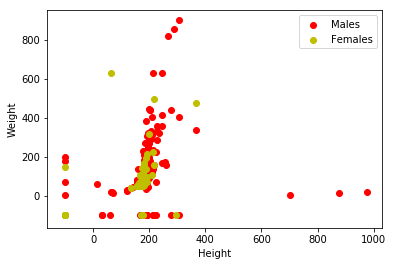

In [21]:
plt.scatter(males['Height'], males['Weight'], c='r', label='Males')
plt.scatter(females['Height'], females['Weight'], c='y', label='Females')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.legend()
plt.show()

## Some Initial Investigation

Next, slice the DataFrame as needed and visualize the distribution of heights and weights by gender.  You should have 4 total plots.  

In the cell below:

* Slice the DataFrame into separate DataFrames by gender
* Complete the `show_distplot` function.  This helper function should take in a DataFrame, a string containing the gender we want to visualize, and the column name we want to visualize by gender. The function should display a distplot visualization from seaborn of the column/gender combination.  

Hint: Don't forget to check the [seaborn documentation for distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) if you have questions about how to use it correctly! 

In [22]:
def show_distplot(dataframe, gender, column_name):
    if gender == 'Male':
        sns.distplot(males[column_name], kde=False)
        plt.title('Distribution of {} for {} Heroes'.format(column_name, gender))
        plt.xlabel(column_name)
    elif gender == 'Female':
        sns.distplot(females[column_name], kde=False)
        plt.title('Distribution of {} for {} Heroes'.format(column_name, gender))
        plt.xlabel(column_name)

C:\Users\Chris\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


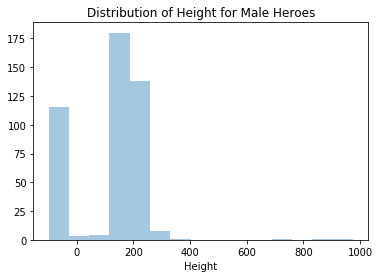

In [60]:
# Male Height
show_distplot(joined_df, 'Male', 'Height')

In [23]:
males['Height'].describe()

count    452.000000
mean     118.426991
std      141.004349
min      -99.000000
25%      -99.000000
50%      183.000000
75%      188.000000
max      975.000000
Name: Height, dtype: float64

C:\Users\Chris\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


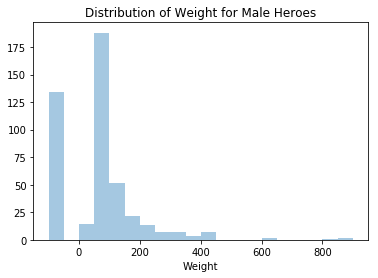

In [61]:
# Male Weight
show_distplot(joined_df, 'Male', 'Weight')

In [32]:
males['Weight'].describe()

count    452.000000
mean      60.075221
std      140.680950
min      -99.000000
25%      -99.000000
50%       79.000000
75%      101.000000
max      900.000000
Name: Weight, dtype: float64

C:\Users\Chris\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


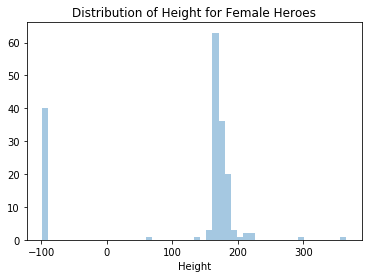

In [62]:
# Female Height
show_distplot(joined_df, 'Female', 'Height')

In [30]:
females['Height'].describe()

count    174.000000
mean     111.939655
std      117.564411
min      -99.000000
25%      157.000000
50%      168.000000
75%      175.000000
max      366.000000
Name: Height, dtype: float64

C:\Users\Chris\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


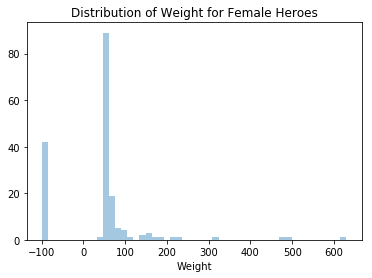

In [63]:
# Female Weight
show_distplot(joined_df, 'Female', 'Weight')

In [28]:
females['Weight'].describe()

count    174.000000
mean      37.057471
std      103.574871
min      -99.000000
25%       48.250000
50%       54.000000
75%       61.000000
max      630.000000
Name: Weight, dtype: float64

Discuss your findings from the plots above, with respect to the distribution of height and weight by gender.  Your explanation should include a discussion of any relevant summary statistics, including mean, median, mode, and the overall shape of each distribution.  

Write your answer below this line:
____________________________________________________________________________________________________________________________

For both males and females, most of the values for height and weight are concentrated near the median. The mean for all values is skewed to the left because of the large number of unknown values with a placeholder of -99. The overall shape of each distribution is positively skewed.

### Sample Question: Most Common Powers

The rest of this notebook will be left to you to investigate the dataset by formulating your own questions, and then seeking answers using pandas and numpy.  Every answer should include some sort of visualization, when appropriate. Before moving on to formulating your own questions, use the dataset to answer the following questions about superhero powers:

* What are the 5 most common powers overall?
* What are the 5 most common powers in the Marvel Universe?
* What are the 5 most common powers in the DC Universe?

In [40]:
powers_df.sum().sort_values(ascending=False).head()

Super Strength    360
Stamina           289
Durability        257
Super Speed       249
Agility           242
dtype: int64

In [48]:
marvel = joined_df.loc[joined_df['Publisher'] == 'Marvel Comics']
marvel.iloc[:,9:].sum().sort_values(ascending=False).head()

Super Strength    199
Durability        148
Stamina           145
Super Speed       132
Agility           121
dtype: int64

In [50]:
dc = joined_df.loc[joined_df['Publisher'] == 'DC Comics']
dc.iloc[:,9:].sum().sort_values(ascending=False).head()

Super Strength    103
Flight             83
Stamina            83
Super Speed        75
Agility            68
dtype: int64

Analyze the results you found above to answer the following question:

How do the top 5 powers in the Marvel and DC universes compare?  Are they similar, or are there significant differences? How do they compare to the overall trends in the entire Superheroes dataset?

Write your answer below this line:
____________________________________________________________________________________________________________________________
Marvel comics top 5 powers are same as the top 5 powers in the entire superheroes dataset. Marvel and DC share 4 of the top 5 superpowers. The only difference between the 2 is that most DC heroes have the Flight ability while Marvel heroes have the Durability ability.

### Your Own Investigation

For the remainder of this lab, you'll be focusing on coming up with and answering your own question, just like we did above.  Your question should not be overly simple, and should require both descriptive statistics and data visualization to answer.  In case you're unsure of what questions to ask, some sample questions have been provided below.

Pick one of the following questions to investigate and answer, or come up with one of your own!

* Which powers have the highest chance of co-occurring in a hero (e.g. super strength and flight), and does this differ by gender?
* Is there a relationship between a hero's height and weight and their powerset?
* What is the distribution of skin colors amongst alien heroes?

Explain your question below this line:
____________________________________________________________________________________________________________________________



Some sample cells have been provided to give you room to work. If you need to create more cells, you can do this easily by:

1. Highlighting a cell and then pressing `esc` to enter command mode.
1. Pressing `b` to add a cell below the currently highlighted cell, or `a` to add one above it.  

Be sure to include thoughtful, well-labeled visualizations to back up your analysis!

In [69]:
joined_df['Race'].unique()

array(['Ungaran', 'Cosmic Entity', 'Xenomorph XX121', 'God / Eternal',
       'Symbiote', 'Atlantean', 'Alien', 'Neyaphem', 'New God', 'Alpha',
       'Bizarro', 'Demon', 'Vampire', 'Dathomirian Zabrak', 'Amazon',
       'Kryptonian', 'Kakarantharaian', 'Zen-Whoberian', 'Strontian',
       'Kaiju', 'Saiyan', 'Gorilla', 'Rodian', 'Flora Colossus',
       'Asgardian', 'Demi-God', 'Eternal', 'Gungan', 'Bolovaxian',
       'Animal', 'Czarnian', 'Martian', 'Spartoi', 'Luphomoid',
       'Parademon', 'Yautja', 'Maiar', 'Clone', 'Talokite', 'Korugaran',
       'Zombie', 'Tamaranean', 'Frost Giant', 'Mutant / Clone',
       "Yoda's species"], dtype=object)

In [66]:
humans = ['Human', 'Icthyo Sapien', 'Human / Radiation', 'Cyborg', 'Android', 'Mutant', 'Inhuman', 'Human / Clone', 'Human-Kree', 'Human / Cosmic', 'Human / Altered', 'Human-Vuldarian', 'Metahuman', 'Human-Vulcan', 'Human-Spartoi', '-']
alien = joined_df

for race in humans:
    alien.drop(alien.loc[alien['Race'] == race].index, inplace=True)

In [68]:
alien.head()

,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,Agility,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
name,,,,,,,,,,,,,,,,,,,,,
Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0,False,...,False,False,False,False,False,False,False,False,False,False
Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0,False,...,False,False,False,False,False,False,False,False,False,False
Alien,Male,-,Xenomorph XX121,No Hair,244.0,Dark Horse Comics,black,bad,169.0,True,...,False,False,False,False,False,False,False,False,False,False
Anti-Monitor,Male,yellow,God / Eternal,No Hair,61.0,DC Comics,-,bad,-99.0,False,...,False,True,False,False,False,False,False,False,False,False
Anti-Venom,Male,blue,Symbiote,Blond,229.0,Marvel Comics,-,-,358.0,False,...,True,False,False,True,False,False,False,False,False,False


In [78]:
alien['Race'].value_counts()

God / Eternal         13
Kryptonian             7
Alien                  7
Symbiote               7
Demon                  6
Alpha                  5
Asgardian              5
Atlantean              4
Cosmic Entity          4
New God                3
Animal                 3
Amazon                 2
Eternal                2
Demi-God               2
Saiyan                 2
Frost Giant            2
Luphomoid              1
Gorilla                1
Talokite               1
Martian                1
Tamaranean             1
Strontian              1
Rodian                 1
Mutant / Clone         1
Korugaran              1
Neyaphem               1
Bolovaxian             1
Vampire                1
Gungan                 1
Zombie                 1
Bizarro                1
Czarnian               1
Yoda's species         1
Maiar                  1
Yautja                 1
Kaiju                  1
Ungaran                1
Kakarantharaian        1
Spartoi                1
Parademon              1


In [114]:
def color_plot(obj):
    colors = {}
    for item in obj:
        if item not in colors.keys():
            colors[item] = 1
        else:
            colors[item] += 1
            
    plt.bar(list(colors.keys()), colors.values())
    plt.xlabel('Colors')
    plt.ylabel('Frequency')
    plt.title('Frequency of Colors')
    plt.show()

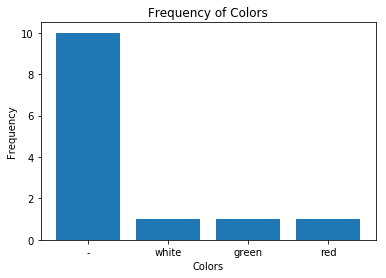

In [115]:
GodEternal = alien.loc[alien['Race'] == 'God / Eternal', 'Skin color']
color_plot(GodEternal)

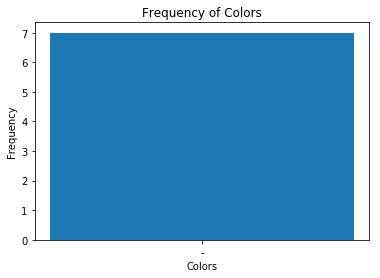

In [116]:
kryptonian = alien.loc[alien['Race'] == 'Kryptonian', 'Skin color']
color_plot(kryptonian)

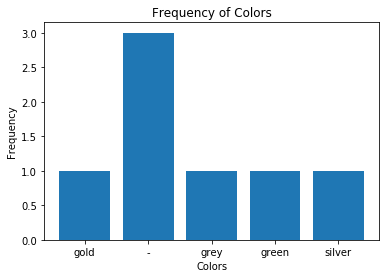

In [117]:
aliens = alien.loc[alien['Race'] == 'Alien', 'Skin color']
color_plot(aliens)

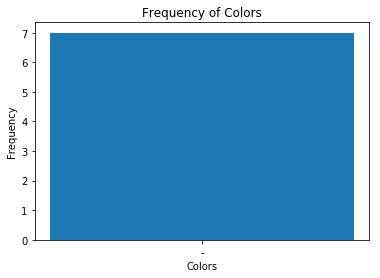

In [118]:
symbiote = alien.loc[alien['Race'] == 'Symbiote', 'Skin color']
color_plot(symbiote)

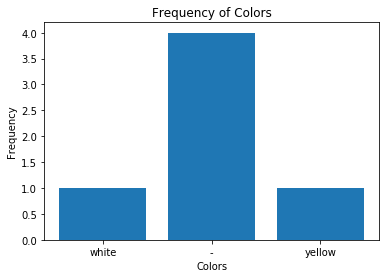

In [119]:
demon = alien.loc[alien['Race'] == 'Demon', 'Skin color']
color_plot(demon)

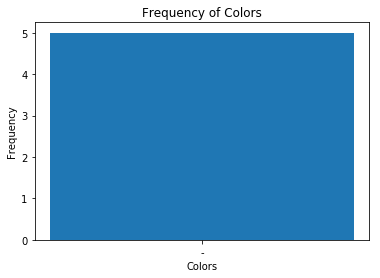

In [120]:
alpha = alien.loc[alien['Race'] == 'Alpha', 'Skin color']
color_plot(alpha)

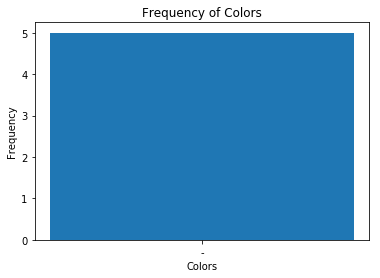

In [121]:
asgardian = alien.loc[alien['Race'] == 'Asgardian', 'Skin color']
color_plot(asgardian)

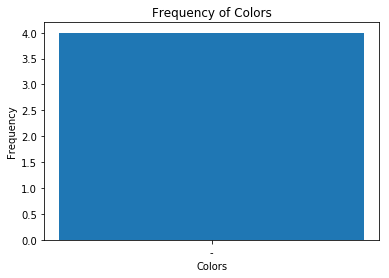

In [122]:
atlantean = alien.loc[alien['Race'] == 'Atlantean', 'Skin color']
color_plot(atlantean)

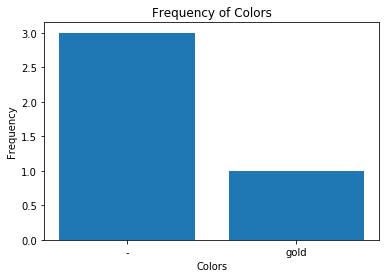

In [123]:
cosmicentity = alien.loc[alien['Race'] == 'Cosmic Entity', 'Skin color']
color_plot(cosmicentity)

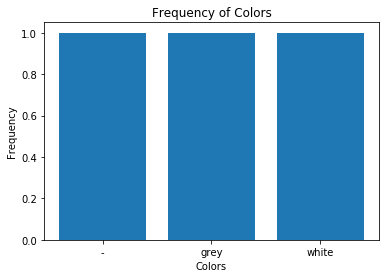

In [124]:
newgod = alien.loc[alien['Race'] == 'New God', 'Skin color']
color_plot(newgod)

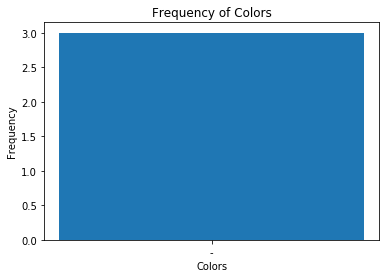

In [125]:
animal = alien.loc[alien['Race'] == 'Animal', 'Skin color']
color_plot(animal)

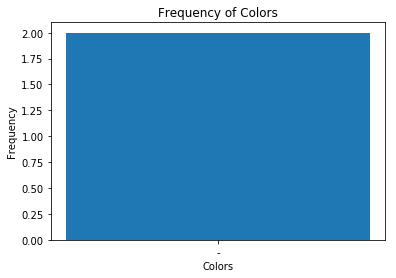

In [126]:
amazon = alien.loc[alien['Race'] == 'Amazon', 'Skin color']
color_plot(amazon)

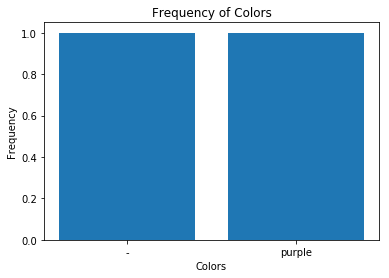

In [127]:
eternal = alien.loc[alien['Race'] == 'Eternal', 'Skin color']
color_plot(eternal)

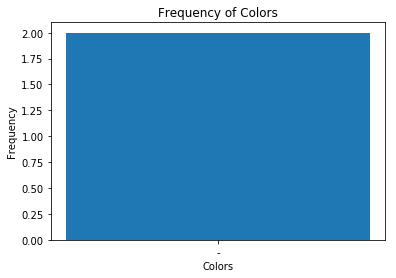

In [128]:
demigod = alien.loc[alien['Race'] == 'Demi-God', 'Skin color']
color_plot(demigod)

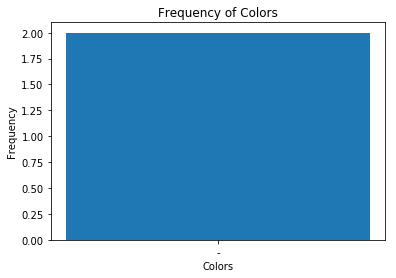

In [129]:
saiyan = alien.loc[alien['Race'] == 'Saiyan', 'Skin color']
color_plot(saiyan)

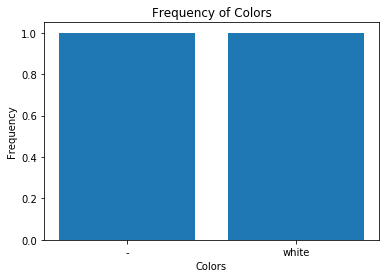

In [130]:
frostgiant = alien.loc[alien['Race'] == 'Frost Giant', 'Skin color']
color_plot(frostgiant)

## Summary

In this lab, we demonstrated our mastery of:
* Using all of our Pandas knowledge to date to clean the dataset and deal with null values
* Using Queries and aggregations to group the data into interesting subsets as needed
* Using descriptive statistics and data visualization to find answers to questions we may have about the data